In [ ]:
#installing packages we need
!pip install nlp_utils

In [ ]:
#importing libraries and packages we need
import nltk
import string
import pandas as pd
import nlp_utils as nu
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('wordnet')


In [ ]:
# uploading our data file 
from google.colab import files
files.upload()

In [371]:
#reading the data
df=pd.read_csv('dialogs.txt',names=('Queries','Responses'),sep='\t') 

In [372]:
# checking our dataframe
df.head()

,Queries,Responses
0,"hi, how are you doing?",i'm fine. how about yourself?
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.
2,i'm pretty good. thanks for asking.,no problem. so how have you been?
3,no problem. so how have you been?,i've been great. what about you?
4,i've been great. what about you?,i've been good. i'm in school right now.


In [373]:
# checking the shape of Dataset
df.shape

(3725, 2)

In [374]:
#checking the information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3725 entries, 0 to 3724
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Queries    3725 non-null   object
 1   Responses  3725 non-null   object
dtypes: object(2)
memory usage: 58.3+ KB


In [375]:
df.describe()

,Queries,Responses
count,3725,3725
unique,3510,3512
top,what do you mean?,what do you mean?
freq,22,22


In [376]:
# checking the missing or null values
df.isnull().sum()

Queries      0
Responses    0
dtype: int64

So, we notice that there are no null/missing values present in our dataset

In [ ]:
# Checking the counts of the values in Queries column
df.Queries.value_counts()

In [ ]:
# Checking the counts of the values in Responses column
df['Responses'].value_counts()

In [379]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [380]:
#Creating a dataframe with polarity socres
sid = SentimentIntensityAnalyzer()
df['scores'] = df['Queries'].apply(sid.polarity_scores)
df=pd.concat([df.drop(['scores'], axis=1), df['scores'].apply(pd.Series)], axis=1)


In [381]:
#checking our dataset with polarity score columns
df.head()

,Queries,Responses,neg,neu,pos,compound
0,"hi, how are you doing?",i'm fine. how about yourself?,0.000,1.000,0.000,0.0000
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.,0.000,0.690,0.310,0.2023
2,i'm pretty good. thanks for asking.,no problem. so how have you been?,0.000,0.250,0.750,0.8402
3,no problem. so how have you been?,i've been great. what about you?,0.495,0.505,0.000,-0.5994
4,i've been great. what about you?,i've been good. i'm in school right now.,0.000,0.549,0.451,0.6249


In [382]:
# importing word cloud
from wordcloud import WordCloud

In [383]:
# we define a function for vizualization  
def wordview(df, label):
    
    subset=df[df[label]==1]
    txt=df.Queries.values
    wc= WordCloud(background_color="white",max_words=1500)

    wc.generate(" ".join(txt))

    plt.figure(figsize=(25,25))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words frequented in {}".format(label), fontsize=25)
    plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=101), alpha=0.80)
  

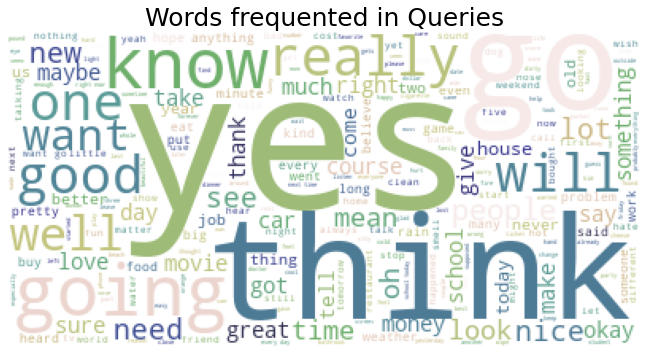

In [384]:
# visualizing most frequent words in the queries column
wordview(df,'Queries')


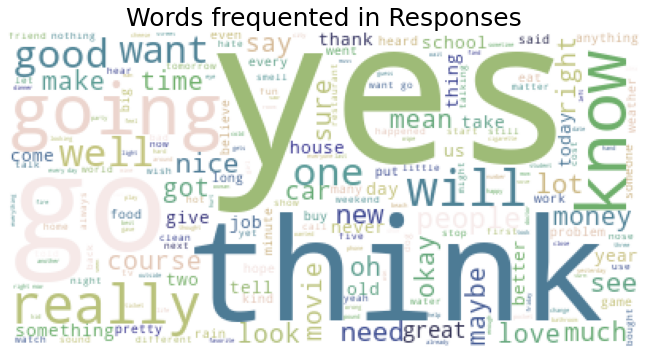

In [385]:
# visualizing top frequent words in the responses column
wordview(df,'Responses')


## Text Preprocessing

In [386]:
# importing regular expressions
import re

In [387]:
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
# Lower case conversion

In [388]:
remove_n = lambda x: re.sub("\n", " ", x)
# removing \n and replacing them with empty value

In [389]:
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)
# removing non ascii characters

In [390]:
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
# removing alpha numeric values

In [391]:
df['Queries'] = df['Queries'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)
# using map function and applying the function on Queries column

In [392]:
df['Responses'] = df['Responses'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)
# using map function and applying the function on Responses column

In [393]:
# checking the data set after preprocessing
df.head()

,Queries,Responses,neg,neu,pos,compound
0,hi how are you doing,i m fine how about yourself,0.000,1.000,0.000,0.0000
1,i m fine how about yourself,i m pretty good thanks for asking,0.000,0.690,0.310,0.2023
2,i m pretty good thanks for asking,no problem so how have you been,0.000,0.250,0.750,0.8402
3,no problem so how have you been,i ve been great what about you,0.495,0.505,0.000,-0.5994
4,i ve been great what about you,i ve been good i m in school right now,0.000,0.549,0.451,0.6249


In [394]:
pd.set_option('display.max_rows',3800)
# Displaying all rows in the dataset

In [ ]:
df

## Top compound Sentence

In [396]:
top_comp=df.sort_values(by='compound', ascending=False)
# re-arranging the compound column in descending order to find the best compound sentence. 

In [397]:
# checking first five entries
top_comp.head()

,Queries,Responses,neg,neu,pos,compound
1019,if we are good we will be happy in heaven wit...,that s what many people believe,0.0,0.400,0.600,0.9001
565,yeah it sounds like it s going to be the best...,exactly it seems like it s going to be loads ...,0.0,0.463,0.537,0.8910
1235,that is a lot of friends do you have a best f...,of course i have lots of best friends,0.0,0.400,0.600,0.8885
3414,well that s okay as long as it helps him rel...,yes we need a relaxed president who thinks cl...,0.0,0.419,0.581,0.8883
3470,so it s better to save money than to have an h...,well the democratic party says it was an hone...,0.0,0.482,0.518,0.8651


## Top positive sentences

In [398]:
top_pos=df.sort_values(by='pos',ascending=False)
#re-arranging the positive column in descending order to find the best positive sentence. 

In [399]:
top_pos.head()

,Queries,Responses,neg,neu,pos,compound
1659,please,you know the rules,0.0,0.0,1.0,0.3182
1191,yes,no that s incomplete,0.0,0.0,1.0,0.4019
223,well congratulations,thank you,0.0,0.0,1.0,0.7184
2745,i agree,you never know what might happen on these free...,0.0,0.0,1.0,0.3612
3583,sure,thank you,0.0,0.0,1.0,0.3182


## Top negative sentence

In [400]:
top_neg=df.sort_values(by='neg',ascending=False)
#re-arranging the positive column in descending order to find the best positive sentence. 

In [401]:
top_neg.head()

,Queries,Responses,neg,neu,pos,compound
1294,no,how do you know,1.000,0.000,0.0,-0.2960
2378,no,he had dirty fingernails,1.000,0.000,0.0,-0.2960
154,no problem,did you need something,1.000,0.000,0.0,-0.5994
3095,no i hate vegetables,but you eat fruits,0.855,0.145,0.0,-0.7096
13,never better thanks,so how have you been lately,0.828,0.172,0.0,-0.5875


## Top neutral sentence

In [402]:
top_neu=df.sort_values(by='neu',ascending=False)
#re-arranging the neutral column in descending order to find the best neutral sentence. 

In [403]:
top_neu.head()

,Queries,Responses,neg,neu,pos,compound
0,hi how are you doing,i m fine how about yourself,0.0,1.0,0.0,0.0
3050,we get hamburgers and steak,oh that s so delicious,0.0,1.0,0.0,0.0
1596,what is gravity,it s the force that pulls everything down,0.0,1.0,0.0,0.0
1597,it s the force that pulls everything down,i don t understand,0.0,1.0,0.0,0.0
1598,i don t understand,if you pour water into a glass the water goes...,0.0,1.0,0.0,0.0


In [404]:
# importing tfidf vectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer

In [405]:
tfidfvec = TfidfVectorizer()

In [406]:
vec = tfidfvec.fit_transform(df['Queries']).toarray()
# changing Queries column into vectors

In [407]:
vec

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.35055373, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

## Application

In [408]:
from sklearn.metrics.pairwise import cosine_distances

In [409]:
 lemmatizer = WordNetLemmatizer()

In [412]:
query = 'How are you ?'
def chatbot(query):
    # step:-1 lemmatization(cleaning)
    query = lemmatizer.lemmatize(query)
    # step:-2 word vectorization - transform
    query_vector = tfidfvec.transform([query]).toarray()
    # step-3: cosine similarity
    similar_score = 1 -cosine_distances(factors,query_vector)
    index = similar_score.argmax() # take max index position
    # searching or matching question
    matching_question = df.loc[index]['Queries']
    response = df.loc[index]['Responses']
    pos_score = df.loc[index]['pos']
    neg_score = df.loc[index]['neg']
    neu_score = df.loc[index]['neu']
    confidence = similar_score[index][0]
    chat_dict = {'match':matching_question,
                'response':response,
                'score':confidence,
                'pos':pos_score,
                'neg':neg_score,
                'neu':neu_score}
    return chat_dict

In [411]:
while True:
    query = input('USER: ')
    if query == 'exit':
        break
        
    response = chatbot(query)
    if response['score'] <= 0.2: # 
        print('BOT: Please rephrase your Question.')
    
    else:
        print('-'*80)
        print('logs:\n Matched Question: %r\n Confidence Score: %0.2f \n PositiveScore: %r \n NegativeScore: %r\n NeutralScore: %r'%(
            response['match'],response['score']*100,response['pos'],response['neg'],response['neu']))
        print('-'*80)
        print('BOT: ',response['response'])

USER: Hi how are you
--------------------------------------------------------------------------------
logs:
 Matched Question: 'hi  how are you doing '
 Confidence Score: 86.23 
 PositiveScore: 0.0 
 NegativeScore: 0.0
 NeutralScore: 1.0
--------------------------------------------------------------------------------
BOT:  i m fine  how about yourself 
USER: I am fine 
--------------------------------------------------------------------------------
logs:
 Matched Question: 'so am i '
 Confidence Score: 56.62 
 PositiveScore: 0.0 
 NegativeScore: 0.0
 NeutralScore: 1.0
--------------------------------------------------------------------------------
BOT:  i had a long day 
USER: I am in shool right now
--------------------------------------------------------------------------------
logs:
 Matched Question: 'i m actually in school right now '
 Confidence Score: 54.33 
 PositiveScore: 0.0 
 NegativeScore: 0.0
 NeutralScore: 1.0
--------------------------------------------------------------